<div style="float: left; width: 50%; height: 200px; padding-bottom:40px; padding-top:80px">
    <img src="http://conf.dato.com/2016/emea/wp-content/uploads/dss16_EU_wideheader.png" alt="PyData Amsterdam 2016 Logo">
</div>
<div style="float: right; width: 50%; height: 300px; padding-bottom:40px">
    <img style="height: 100%; float:right" src="https://pbs.twimg.com/profile_images/710470383208628224/M2196VVE.jpg" alt="Qualogy Logo">
</div>

# Face Recognition with OpenCV and TensorFlow

- Author: Rodrigo Agundez from Qualogy
- Place: Jerusalem, International Convention Center
- Date: Sunday, June 5, 2016
- Time: 10:00
- Room: 1

The goal of this tutorial is to build a simple face recognition system with the use of the opencv library. This tutorial is separated in four parts:
1. Manipulation of Images and Videoss
2. Face Detection and Building the Dataset
3. Building the Recognition Model
4. Recognize Faces in a Live VIdeo Feed
<br>Extra: Try to trick the face recognition to classify other types of objects.

<br>
<h2 align="center" style='color: white; background-color: #be2830'>Let's Get Started!</h2> 

<h2 align="center" style='color: #be2830'>Imports</h2>

In [1]:
import cv2
import numpy as np
import os
import math
from matplotlib import pyplot as plt
%matplotlib inline
import cv2
print cv2.__version__

3.1.0


### A bit about OpenCV
OpenCV is an open source computer vision and machine learning software library.
The library includes a comprehensive set of both classic and state-of-the-art computer vision and machine learning algorithms. These algorithms can be used to:
<div style="float: left; width: 40%; margin-top: 16px; margin-bottom: 16px">
<ul style="align: left; list-style-type:square">
  <li>Detect Faces</li>
  <li>Recognize Faces</li>
  <li>Identify Objects</li>
  <li>Classify human actions in videos</li>
  <li>Track camera movement</li>
  <li>Track moving objects</li>
</ul>
</div>
<div style="float: right; width: 60%; margin-top: 16px; margin-bottom: 16px">
<ul style="align: left; list-style-type:square">
  <li>Extract 3D models of objects</li>
  <li>Produce 3D point clouds from stereo cameras</li>
  <li>Stitch images together to produce a high resolution image of an entire scene</li>
  <li>Find similar images from an image database</li>
  <li>Remove red eyes from images taken using flash</li>
  <li>Follow eye movements</li>
</ul>
</div>

It has C++, C, Python, Java and MATLAB interfaces and supports Windows, Linux, Android and Mac OS. 

### Requiered Packages for this tutorial
<ul style="list-style-type:square">
  <li>OpenCV (cv2)</li>
  <li>Numpy</li>
  <li>matpotlib</li>
</ul>

<h2 align="center" style='color: #be2830'>Let's Take  Picture</h2>

In [2]:
webcam = cv2.VideoCapture(0)
ret, frame = webcam.read()
print ret
webcam.release()

True


<h2 align="center" style='color: #be2830'>How to show it?</h2>

### Resizable Window

In [3]:
# Open a new thread to manage the external cv2 interaction
cv2.startWindowThread()

# Create a window holder to show you image in
cv2.namedWindow("PyData Tutorial", cv2.WINDOW_NORMAL)
cv2.imshow("PyData Tutorial", frame)
 
# Press any key to close external window
cv2.waitKey()   
cv2.destroyAllWindows() 

### Fix Window

In [4]:
# Create a window holder to show you image in
cv2.namedWindow("PyData Tutorial", cv2.WINDOW_AUTOSIZE)
cv2.imshow("PyData Tutorial", frame)

# Press any key to close external window
cv2.waitKey() 
cv2.destroyAllWindows()

### What about within the notebook?

<h2 align="center" style='color: #be2830'>Frame is a numpy array!</h2>

In [5]:
print type(frame) 

<type 'numpy.ndarray'>


### Inside the notebook

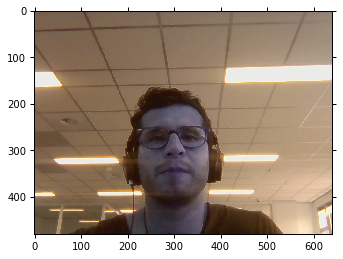

In [6]:
plt.imshow(frame)
plt.show()

### Looks ugly, what happened?
<div align="center" style="margin-top:20px"> 
OpenCV $\rightarrow$ BGR format<br>
matplotlib $\rightarrow$ RGB
</div>

### From BGR to RGB format

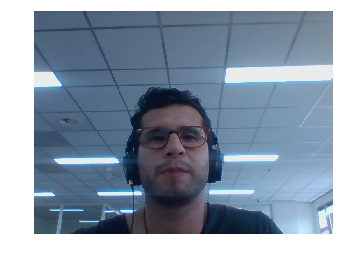

In [7]:
# Pixel color conversion
frame_RGB = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

plt.imshow(frame_RGB)

# Let's take those ugly ticks off
plt.axis("off") 
plt.show()  

<h2 align="center" style='color: #be2830'>Read and Write Images</h2>

``` python
cv2.imwrite(file_path (str), image (numpy.ndarray))

cv2.imread(file_path (str), read_mode (int))
```
#### Read Modes
-  ```1 = cv2.IMREAD_COLOR```
-  ```0 = cv2.IMREAD_GRAYSCALE```
- ```-1 = cv2.IMREAD_UNCHANGED```

### Write in GBR or RGB?

In [8]:
cv2.imwrite('images/picture_GBR.jpg',frame)
cv2.imwrite('images/picture_RGB.jpg',frame_RGB)

os.system("nautilus images") 

0

### Read in GBR or RGB?

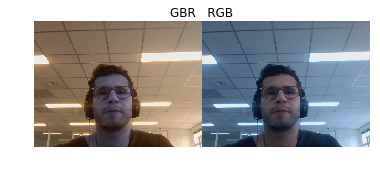

In [9]:
read_mode = 1

picture_GBR = cv2.imread('images/picture_GBR.jpg', read_mode)
picture_RGB = cv2.imread('images/picture_RGB.jpg', read_mode)

# numpy intervention
picture = np.hstack((picture_GBR, picture_RGB))
plt.axis("off")
plt.title("GBR   RGB")
plt.imshow(picture, cmap="Greys_r")
plt.show()

<h2 align="center" style='color: red'>OpenCV read & write</h2>

| Image File |$\rightarrow$|OpenCV     |$\rightarrow$|Image File   |
|:-----------:|:-----------:|:---------:|:-----------:|:-----------:|
| .jpg .png etc| cv2.imread() | numpy array | cv2.imwrite() | .jpg .png etc |
|RGB|$\rightarrow$|GBR|$\rightarrow$|RGB


### Useful function

In [10]:
def plt_show(image, title=""):
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.axis("off") 
    plt.title(title)
    plt.imshow(image, cmap="Greys_r")
    plt.show()

<h2 align="center" style='color: #be2830'>Let's Take  Video</h2>

In [11]:
# Open connection to camera
webcam = cv2.VideoCapture(0)
print webcam.isOpened()

True


### How to show it?
1. Get a frame from webcam
2. Show the frame
3. Repeat

<h2 align="center" style='color: #be2830'>External Window or in Notebook</h2>

### External Window

In [14]:
cv2.namedWindow("PyData Tutorial", cv2.WINDOW_NORMAL)
 
while True:
      
    _, frame = webcam.read()
    cv2.imshow("PyData Tutorial", frame) 
     
    # code 27 is ESC key
    if cv2.waitKey(20) & 0xFF == 27:
        break
        
cv2.destroyAllWindows() 

NOTE: Video feed killed but object still exists

### In Notebook
Note: Since the notebook does not run as a tty device type getch() returns an error so we cannot catch a press key with this method. <br>
`Instead KeyboardInterrupt` exception.

In [15]:
# module to allow interactive window inside notebook
from IPython.display import clear_output
try:
    while True:
        _, frame = webcam.read()
        plt_show(frame)
        clear_output(wait=True)
except KeyboardInterrupt:
    print "Live Video Interrupted"

Live Video Interrupted


### Slower, why? I don't really know

## Video feed killed but live video feed object still exists

In [16]:
webcam.release()

<h2 align="center" style='color: #be2830'>Drawing and Writing on Images/Videos</h2>

``` python
cv2.line(image, coord_1 (tuple), coord_2 (tuple), color_GBR (tuple), thickness (int))

cv2.rectangle(image, top_left (tuple), bottom_right (tuple), color_GBR (tuple), thickness (int))

cv2.circle(image, center (tuple), radius (int), color_GBR (tuple), thickness (int))

cv2.ellipse(image, center (tuple), axes_length (tuple), angle (int), start_angle (int), end_angle (int), color (tuple), thickness (int))

cv2.putText(image, text (str), bottom_left (tuple), font, size (float), color (tuple), thickness (int))
```


### Rectangle and dynamic typing

In [24]:
webcam = cv2.VideoCapture(0)
cv2.namedWindow("PyData Tutorial", cv2.WINDOW_AUTOSIZE)
message = ""

while webcam.isOpened():
    
    _, frame = webcam.read()
    
    cv2.rectangle(frame, (100, 100), (530, 400), (150, 150, 0), 3)
    cv2.putText(frame, message, (95, 95), cv2.FONT_HERSHEY_SIMPLEX, .7, 
                (150, 150, 0), 2)
    
    cv2.imshow('PyData Tutorial',frame)
    key = cv2.waitKey(100) & 0xFF
    if key not in [255, 27]:
        message += chr(key)
    elif key == 27:
        break
        
# release both video objects created
webcam.release()
cv2.destroyAllWindows()

<h2 align="center" style='color: #be2830'>Using a Mask</h2>
<br>
<div style="float: left; width: 40%; padding-bottom:40px">
    <p> Stencil </p>
    <img src="http://blog.speckproducts.com/blog/wp-content/uploads/2013/12/news_miamiMiniMaker-03_800w.jpg">
</div>
<div style="float: right; width: 40%; padding-bottom:40px">
    <p> Semiconductors </p>
    <img src="http://willson.cm.utexas.edu/Research/Sub_Files/Immersion/images/immersion_2.jpg">
</div>


### View through a circle

In [25]:
webcam = cv2.VideoCapture(0)
cv2.namedWindow("PyData Tutorial", cv2.WINDOW_AUTOSIZE)

while webcam.isOpened():
    
    _, frame = webcam.read()
    mask = np.zeros_like(frame)
    height, width, _ = frame.shape
    
    cv2.circle(mask, (width / 2, height / 2), 200, (255, 255, 255), -1)
    frame = np.bitwise_and(frame, mask)
    
    cv2.imshow('PyData Tutorial', frame)
    if cv2.waitKey(40) & 0xFF == 27:
        break
        
# release both video objects created
webcam.release()
cv2.destroyAllWindows()

<h2 align="center" style='color: #be2830'>Handeling Mouse Events</h2>

``` python
cv2.setMouseCallback(window (str), callback_function)
def function(event (int), x (int), y (int), )
```
<div style="float: left; width: 50%">
Events:
- `cv2.EVENT_MOUSEMOVE`
- `cv2.EVENT_LBUTTONDOWN`
- `cv2.EVENT_RBUTTONDOWN`
- `cv2.EVENT_MBUTTONDOWN`
- `cv2.EVENT_LBUTTONUP`
</div>
<br>
- `cv2.EVENT_RBUTTONUP`
- `cv2.EVENT_MBUTTONUP`
- `cv2.EVENT_LBUTTONDBLCLK`
- `cv2.EVENT_RBUTTONDBLCLK`
- `cv2.EVENT_MBUTTONDBLCLK`

### Draw circle with mouse

In [26]:
# mouse callback function
def draw_circle(event,x,y,flags,param):
    global x_in, y_in
    if event == cv2.EVENT_LBUTTONDOWN:
        x_in = x 
        y_in = y
    elif event == cv2.EVENT_LBUTTONUP:
        cv2.circle(frame, (int((x + x_in)) / 2, int((y + y_in)/2)), 
                   int(math.sqrt((y - y_in) ** 2 + (x - x_in) ** 2) / 2), (150, 150, 0), -1)
        
cv2.namedWindow('PyData Tutorial')
cv2.setMouseCallback('PyData Tutorial', draw_circle)

webcam = cv2.VideoCapture(0)
_, frame = webcam.read()
webcam.release()

while True:
    cv2.imshow('PyData Tutorial',frame)
    if cv2.waitKey(20) & 0xFF == 27:
        break
cv2.destroyAllWindows()

### Using a mask to uncover image

In [27]:
# mouse callback function
def draw_circle(event,x,y,flags,param):
    global x_in, y_in
    if event == cv2.EVENT_LBUTTONDOWN:
        x_in = x 
        y_in = y
    elif event == cv2.EVENT_LBUTTONUP:
        cv2.circle(mask, (int((x + x_in)) / 2, int((y + y_in)/2)), 
                   int(math.sqrt((y - y_in) ** 2 + (x - x_in) ** 2) / 2), 
                   (255, 255, 255), -1)
        
cv2.namedWindow('PyData Tutorial')
cv2.setMouseCallback('PyData Tutorial', draw_circle)

webcam = cv2.VideoCapture(0)
_, frame = webcam.read()
mask = np.zeros_like(frame)

while True:
    _, frame = webcam.read()
    frame = np.bitwise_and(frame, mask)
    cv2.imshow('PyData Tutorial', frame)
    if cv2.waitKey(40) & 0xFF == 27:
        break
webcam.release()
cv2.destroyAllWindows()

## NEXT
<ol> 
    <h2> <li> Manipulation of Images and Videos. [DONE]</h2> 
    <h2 style='color: #be2830'><a style='color: #be2830' href="http://localhost:8888/notebooks/02_Face_Detection_and_Building_the_Dataset.ipynb"> <li> Face Detection and Building the Dataset</a></h2>
    <h2> <li>Building the Recognition Model</h2>
    <h2> <li> Recognize Faces in a Live VIdeo Feed</h2>
<ol>